In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mopet import mopet

from synchronization import experiments
from synchronization import plots
from synchronization import runner

# Effect of uncorrelated noise on coupled EI networks

Hypothesis
* in certain parameter regimes the EI networks synchronize while within synchronization decreases
* only a fraction of the neurons in a network spike in each cycle, we see a widened voltage distribution

Setup
* 2 coupled network case
* independent noise with varying strengths

Metrics & Visualization
* overlap in peak frequency in power spectrum indicates synchronization
* local and global order parameter quantify synchronization respectively
* optional: mean phase coherence

Run for different noise strenghts and plot PSD spectra of all runs.
A handful of parameter sets should suffice to get a first intuition. Afterwards we can do an exhaustive parameter exploration.

In [2]:
factor = 1

# overwriting default parameters
default_params = {

  # synaptic coupling strengths, most important parameters for tuning PING mechanism
  "J_itoi": 1.5 * factor,
  "J_etoe": 0.4 * factor,
  "J_etoi": 0.4 * factor,
  "J_itoe": 2.0 * factor,

  "runtime": 1000.0,

  "N_e": 1000,
  "N_i": 250,

  "ou_enabled": [False, False],

  # Independent spike trains generated by Poisson Point Process for each target neuron
  "poisson_enabled": [True, True],
  "poisson_variance": 1.0,
   # noise frequency ration between networks
  "poisson_p": 0.83,

  # 200 Hz as in Meng et al.
  "poisson_mean_input": 200, 

  # Neuron size of each Poisson Group
  "poisson_size": 800,
  
  "J_ppee": 2.0,
  # increase from 0.1 to 0.2 increases mainly amplitude
  "J_ppei": 2.0,

  # if set to default of 0.1 this leads to strange split in frequency band
  "const_delay": 0.2,
   "N_pop": 2,

   "p_etoe": 0.1,
   "p_etoi": 0.4,
   "p_itoe": 0.1,
   "p_itoi": 0.4,
}

params = {
  "poisson_variance": np.arange(0.1, 6, 0.5),
  "poisson_p": np.arange(0.75, 1, .025),
}

varying_params = list(params.keys())

In [3]:
ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=params, 
    default_params=default_params,
    exploration_name="uncorrelated_noise"
)

In [4]:
ex.run()

m(pid=78863) 0.7377 s (73%) simulated in 1m 10s, estimated 25s remaining.
(pid=78852) 277.25 ms (27%) simulated in 30s, estimated 1m 18s remaining.
(pid=78851) 271.3 ms (27%) simulated in 30s, estimated 1m 21s remaining.
(pid=78857) 273.55 ms (27%) simulated in 30s, estimated 1m 20s remaining.
(pid=78858) 0.3645 s (36%) simulated in 40s, estimated 1m 10s remaining.
(pid=78865) 178.5 ms (17%) simulated in 20s, estimated 1m 32s remaining.
(pid=78848) 1. s (100%) simulated in 1m 28s
(pid=78848) ==== Network Run Finished ====
(pid=78848) runtime: 90.2
(pid=78848) Starting Aggregation ...
(pid=78855) 0.3697 s (36%) simulated in 40s, estimated 1m 8s remaining.
(pid=78856) 0.46735 s (46%) simulated in 50s, estimated 57s remaining.
(pid=78854) 0.3696 s (36%) simulated in 40s, estimated 1m 8s remaining.
(pid=78853) 0.36885 s (36%) simulated in 40s, estimated 1m 8s remaining.
 80%|████████  | 96/120 [08:16<05:39, 14.15s/it](pid=78848) Initializing net ...
(pid=78848) Poisson rate for network 1: 

In [5]:
ex.load_results(all=True)

ex.explore_params
ex.results.keys()

100%|██████████| 120/120 [00:15<00:00,  7.75it/s]


dict_keys([0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
ex.df["freq_diff"] = np.abs(ex.df["peak_freq"] - ex.df["peak_freq_2"])
ex.df[["peak_freq", "peak_freq_2", "max_amplitude", "max_amplitude_2", "freq_diff"]]

peak_freq  peak_freq_2  max_amplitude  max_amplitude_2  freq_diff
0          2.0          4.0      25.039774        22.944161        2.0
1          2.0          2.0      27.782655        24.637840        0.0
10        78.0         52.0      33.396524        28.916397       26.0
100       76.0          4.0      71.114525       112.820035       72.0
101       98.0         34.0     106.748868        81.827351       64.0
..         ...          ...            ...              ...        ...
95        60.0         56.0      80.691097        81.406482        4.0
96        64.0         20.0     126.085631        69.292466       44.0
97        56.0         48.0      56.336744        68.882791        8.0
98        88.0         30.0      65.334426        93.231880       58.0
99        74.0         48.0      60.373549       161.816255       26.0

[120 rows x 5 columns]

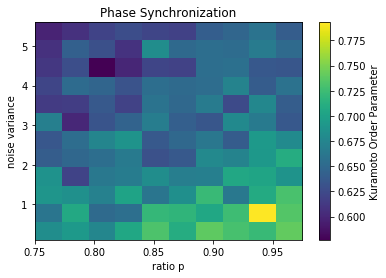

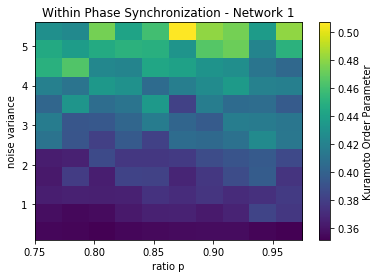

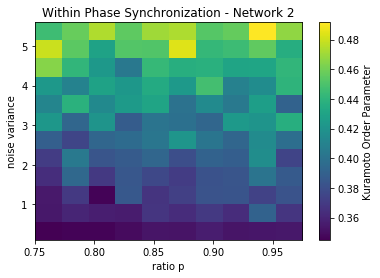

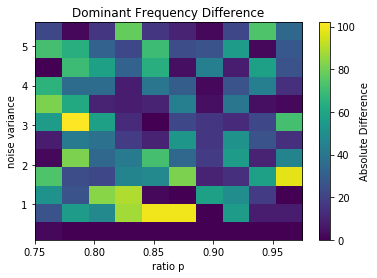

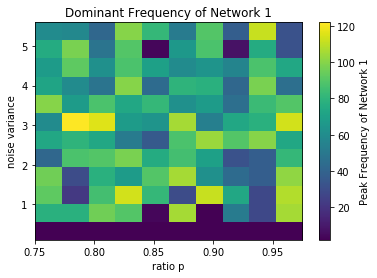

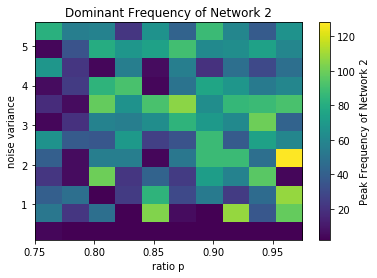

In [7]:
# phase synchronization
pivoted_synch = ex.df.pivot_table(values='phase_synchronization', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_synch,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Phase Synchronization",
    colorbar="Kuramoto Order Parameter"
)

# within phase synchronization of net 1
pivoted_synch = ex.df.pivot_table(values='plv_net_1', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_synch,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Within Phase Synchronization - Network 1",
    colorbar="Kuramoto Order Parameter"
)

# within phase synchronization of net 2
pivoted_synch = ex.df.pivot_table(values='plv_net_2', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_synch,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Within Phase Synchronization - Network 2",
    colorbar="Kuramoto Order Parameter"
)

# freq diff
plots.heat_map_pivoted(
    pivot_table=ex.df.pivot_table(values='freq_diff', index='poisson_variance', columns='poisson_p', aggfunc='first'),
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Dominant Frequency Difference",
    colorbar='Absolute Difference'
)

# dom freq of network 1
pivoted_A = ex.df.pivot_table(values='peak_freq', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_A,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Dominant Frequency of Network 1",
    colorbar='Peak Frequency of Network 1'
)

# dom freq of network 2
pivoted_B = ex.df.pivot_table(values='peak_freq_2', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_B,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Dominant Frequency of Network 2",
    colorbar='Peak Frequency of Network 2'
)

In [8]:
for key, model in ex.results.items():
    row = ex.df.iloc[key]

    title = ""
    for param in varying_params:
        title += f" {param}: {row[param]}"

#     plots.psd(model, title=f"PSD of 1st network - {title}", population=1, duration=1000)
    # plots.psd(model, title=f"PSD of 2nd network - {title}", population=2, duration=1000)

    # TODO: raster plots take too much memory and crash vs code currently ...
    # plots.raster(title="Raster of 1st network", model=model)
    # plots.raster(title="Raster of 2nd network", model=model, population=2)

In [9]:
data = list([(ex.df.iloc[key][param], item) for key, item in ex.results.items()])
titles, models = zip(*data)

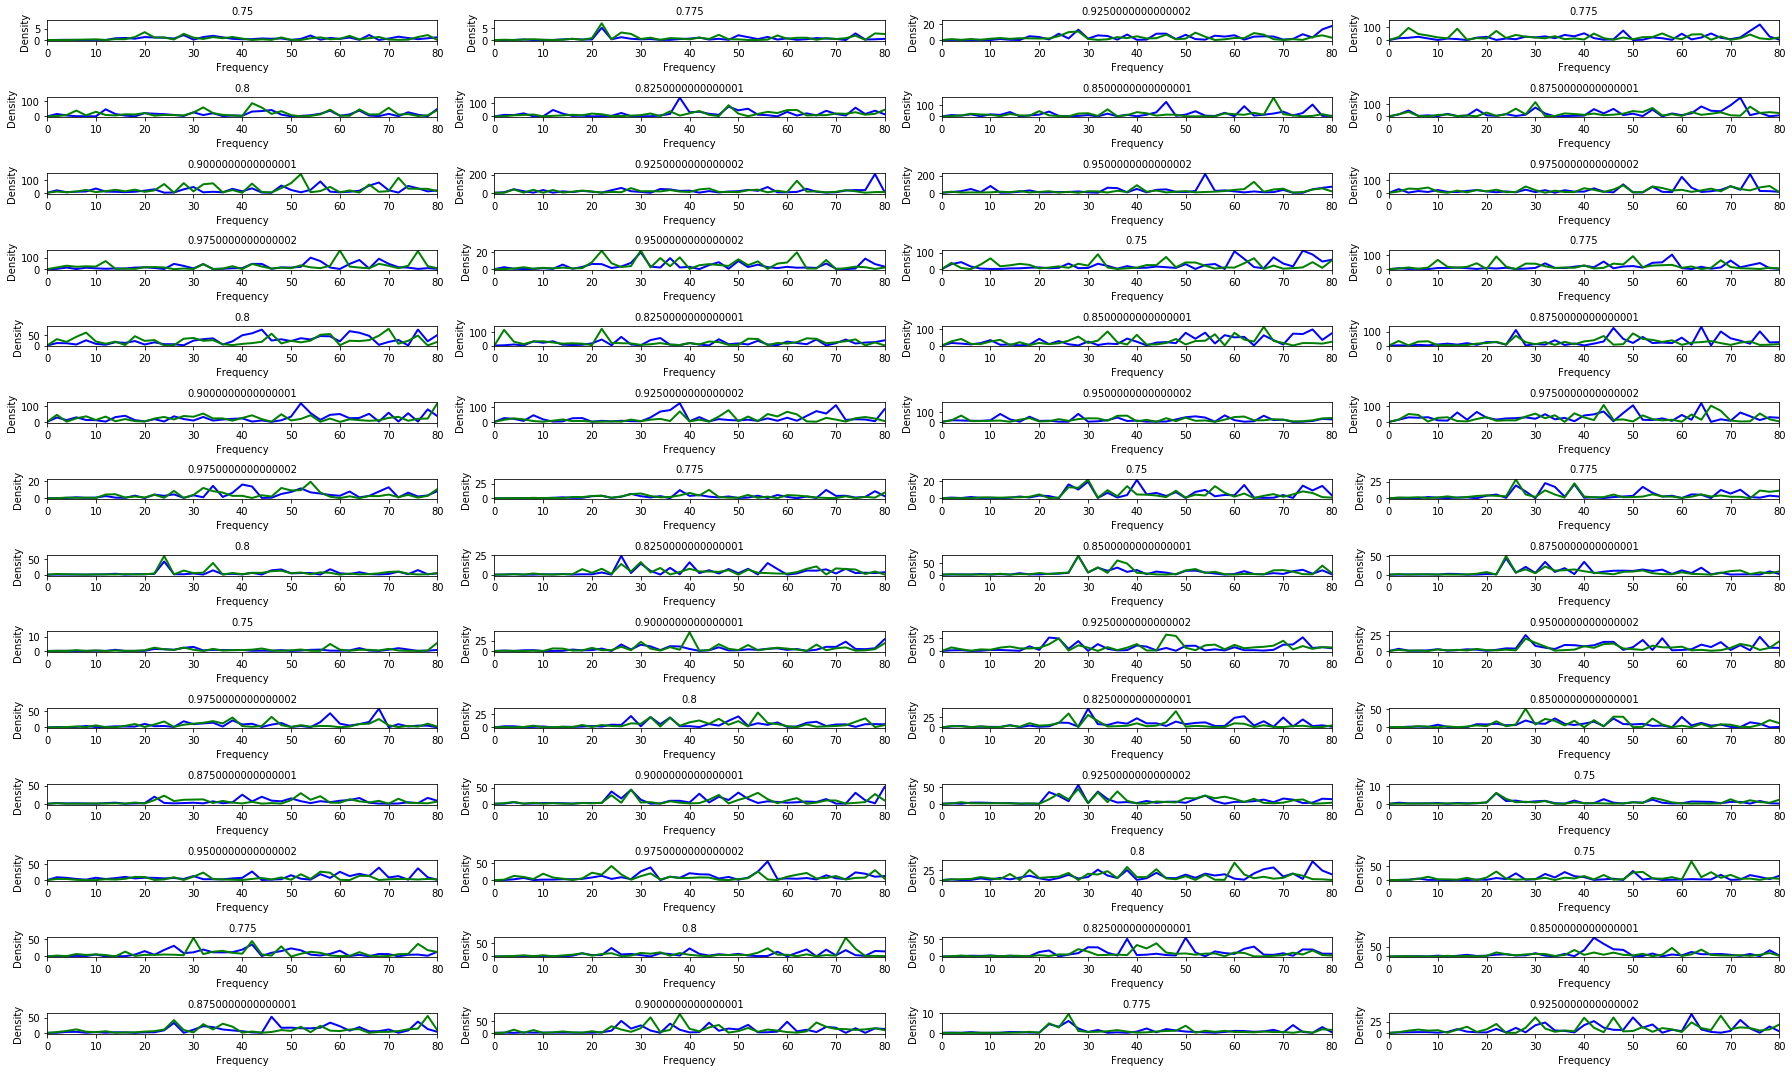

In [10]:
plots.all_psd(data, n_cols=14, n_rows=4, figsize=(25, 15))
plt.show()

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x131bd0650>)

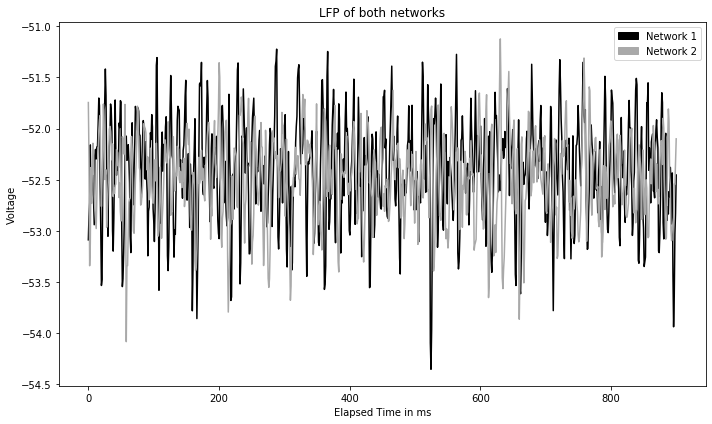

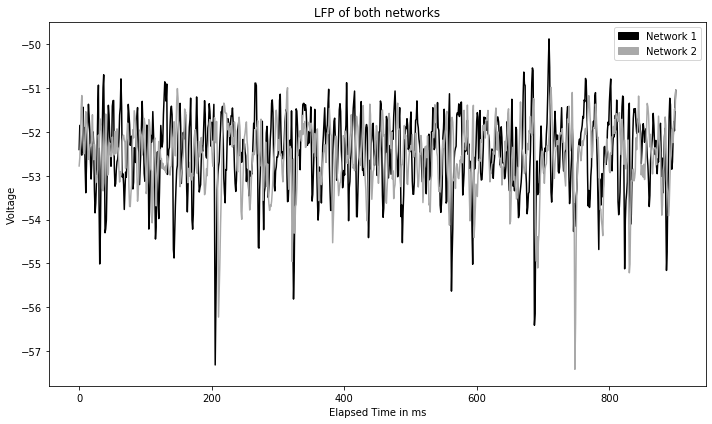

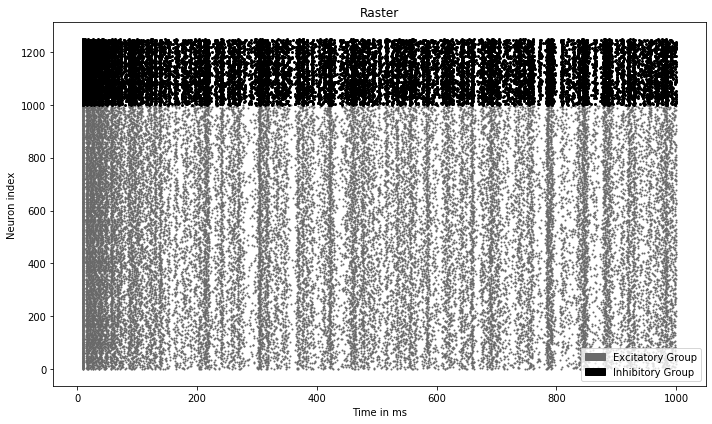

In [11]:
# no activity  -> subthreshold
plots.lfp_nets(models[0], skip = 100)

# high frequency oscillation
plots.lfp_nets(models[2], skip = 100)
plots.raster(models[2])

# high frequency oscillation
# plots.lfp_nets(models[6])
# plots.raster(models[6])

1. Next steps for parameter exploration:
    * run on server or on my second computer
 
2. Next steps to analyze and compare specific parameter sets
    * use different notebook to experiment and analyze specific sets
    * reduce complexity of model -> smaller number of neurons, only one network, etc.

Analyze spike time variability

* plot voltage trace of a single neuron to see when it spikes

Okay, what are the most important next steps?

1. Need to aggregate data to understand parameter exploration results
2. Look at increasing noise and analyze in detail -> Sunday

3. Run parameter exploration and see if network 1 and network 2 synchronize at some point!